In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.colors as mcolors
import numpy as np
import collections
import seaborn as sns

In [4]:
data = pd.read_csv('pitch_data_2008_2021')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,24,44,88,89,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pitch_data = data[['pitch_name', 'plate_x', 'plate_z', 'description', 'stand']]

In [6]:
pitch_data['description'].replace('blocked_ball', 'ball', inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:

area_1_bounds = [-.725, -.241667, 2.833, 3.5]
area_2_bounds = [-.241667, .241667, 2.833, 3.5]
area_3_bounds = [.241667, .725, 2.833, 3.5]
area_4_bounds = [-.725, -.241667, 2.166, 2.833]
area_5_bounds = [-.241667, .241667, 2.166, 2.833]
area_6_bounds = [.241667, .725, 2.166, 2.833]
area_7_bounds = [-.725, -.241667, 1.5, 2.166]
area_8_bounds = [-.241667, .241667, 1.5, 2.166]
area_9_bounds = [.241667, .725, 1.5, 2.166]

zones = [area_1_bounds, area_2_bounds, area_3_bounds, area_4_bounds, area_5_bounds, area_6_bounds, area_7_bounds, area_8_bounds, area_9_bounds]

In [8]:
outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]

outside_1_bounds1 = [-.9666, -.725, 2.5, 3.833]
outside_1_bounds2 = [-.725, 0, 3.5, 3.833]
outside_2_bounds1 = [.725,.9666, 2.5, 3.833]
outside_2_bounds2 = [.725, .9666, 3.5, 3.833]
outside_3_bounds1 = [-.9666, -.725, 1.1666, 1.5]
outside_3_bounds2 = [-.725, 0, 1.1666, 1.5]
outside_4_bounds1 = [.725, .9666, 1.1666, 1.5]
outside_4_bounds2 = [0, .725, 1.1666, 1.5]

outside_zones = [(outside_1_bounds1, outside_1_bounds2), (outside_2_bounds1, outside_2_bounds2), (outside_3_bounds1, outside_3_bounds2), (outside_4_bounds1, outside_4_bounds2)]

In [9]:
centers = []
for zone in zones:
    zone_center = []
    zone_center.append(((zone[1] - zone[0])/2 + zone[0])-.175)
    zone_center.append((zone[3] - zone[2])/2 + zone[2]-.05)
    centers.append(zone_center)
centers

[[-0.6583334999999999, 3.1165000000000003],
 [-0.175, 3.1165000000000003],
 [0.3083335, 3.1165000000000003],
 [-0.6583334999999999, 2.4495000000000005],
 [-0.175, 2.4495000000000005],
 [0.3083335, 2.4495000000000005],
 [-0.6583334999999999, 1.783],
 [-0.175, 1.783],
 [0.3083335, 1.783]]

In [10]:
def grab_pitches_from_zone(data, zone_bounds):
    zone_data = data[data['plate_x'] > zone_bounds[0]]
    zone_data = zone_data[zone_data['plate_x'] < zone_bounds[1]]
    zone_data = zone_data[zone_data['plate_z'] > zone_bounds[2]]
    zone_data = zone_data[zone_data['plate_z'] < zone_bounds[3]]
    return zone_data
def pct_correct_per_zone(data, zone_bounds):
    zone_data = grab_pitches_from_zone(data, zone_bounds)
    return (zone_data['description'].value_counts()['called_strike'] / zone_data['description'].size)*100
def pct_correct_per_zone_outside(data, zone_bounds1, zone_bounds2):
    zone_data1 = grab_pitches_from_zone(data, zone_bounds1)
    zone_data2 = grab_pitches_from_zone(data, zone_bounds2)
    return ((zone_data1['description'].value_counts()['called_strike'] + zone_data2['description'].value_counts()['called_strike']) / (zone_data1['description'].size + zone_data2['description'].size))*100

In [11]:
def inside_zone_list(data):
    inside_zone_list = []
    for zone in zones:
           inside_zone_list.append(pct_correct_per_zone(data, zone))
    return inside_zone_list
def outside_zone_list(data):
    outside_zone_list = []
    for zone in range(len(outside_zones)):
        try:
             outside_zone_list.append(pct_correct_per_zone_outside(data, outside_zones[zone][0], outside_zones[zone][1]))
        except:
            pass
    return  outside_zone_list

NameError: name 'changeups' is not defined

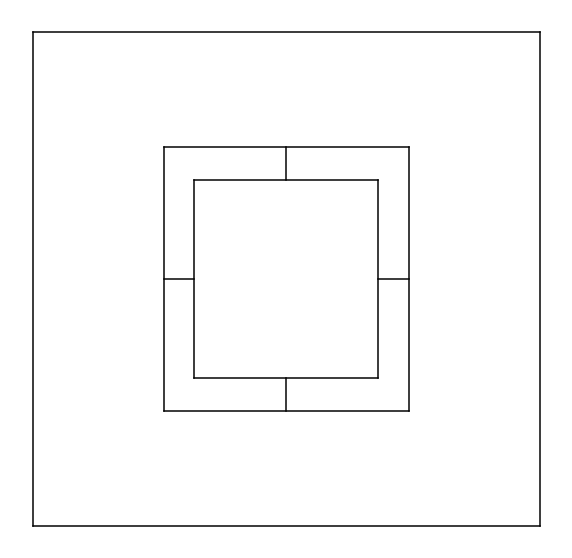

In [12]:
cmap = plt.get_cmap('coolwarm')
out_norm = mcolors.Normalize(vmin=0, vmax=50)
outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=60, vmax=100)
rectangles = [(-.725,2.833), (-.241667,2.833), (.241667, 2.833), (-.725,2.166), (-.241667,2.166), (.241667, 2.166), (-.725,1.5), (-.241667,1.5), (.241667, 1.5)]

fig, ax = plt.subplots(figsize =(10,10))

plt.plot([-2,-2],[0,5], color="black")
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

plt.plot([-.725,-.725],[1.5,3.5], color="black")
plt.plot([.725,.725],[1.5,3.5], color="black")
plt.plot([-.725,.725],[1.5,1.5], color="black")
plt.plot([-.725,.725],[3.5,3.5], color="black")

plt.plot([-.9666,-.9666],[1.1666,3.833], color="black")
plt.plot([.9666,.9666],[1.1666,3.833], color="black")
plt.plot([-.9666,.9666],[1.166,1.166], color="black")
plt.plot([-.9666,.9666],[3.833,3.833], color="black")

plt.plot([0,0],[3.5,3.833], color="black")
plt.plot([0,0],[1.16666,1.5], color="black")
plt.plot([-.9666,-.725],[2.5,2.5], color="black")
plt.plot([.725,.9666],[2.5,2.5], color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

for i, value in enumerate(inside_zone_list(changeups)): #inside data here
    rect = patch.Rectangle(rectangles[i], .4833, .6666, linewidth=1, edgecolor='black', facecolor=cmap(norm(value)))
    ax.add_patch(rect)
    ax.text(centers[i][0], centers[i][1], '{:.2f}%'.format(pitches_dict[pitch][i]), fontsize = 13)

for i, value in enumerate(outside_zone_list(changeups)): #outside_data_here
    rect1 =  patch.Rectangle(outside_rectangles[i][0], outside_rectangles[i][1], outside_rectangles[i][2], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
    rect2 = patch.Rectangle(outside_rectangles[i][3], outside_rectangles[i][4], outside_rectangles[i][5], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
    ax.add_patch(rect1)
    ax.add_patch(rect2)

ax.set_title(pitch)

plt.show()